# Raster io test

Paths:
1. /att/nobackup/maronne/lake/forCaleb/


In [1]:
import numpy as np

In [2]:
import os
try:
    import rasterio
except ModuleNotFoundError:
    os.system('conda install -c conda-forge rasterio')

In [3]:
from rasterio.plot import show
import matplotlib.pyplot as plt

In [4]:
TIF_PATH = '/att/nobackup/maronne/lake/forCaleb/'

In [14]:
src = rasterio.open(TIF_PATH+'LC8_075011_20170709_stack_clip.tif')

In [6]:
src.crs

CRS.from_epsg(32605)

In [7]:
print(src.width)
print(src.height)

5883
5352


In [8]:
src.count

35

In [18]:
band_r = src.read(1)
band_g = src.read(2)
band_b = src.read(3)

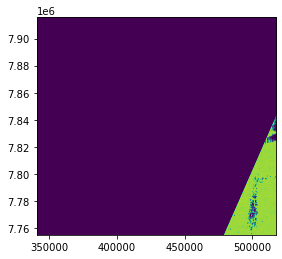

<AxesSubplot:>

In [15]:
%matplotlib inline
show((src, 1))

In [16]:
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))
    

In [19]:
redn = normalize(band_r)
greenn = normalize(band_g)
bluen = normalize(band_b)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


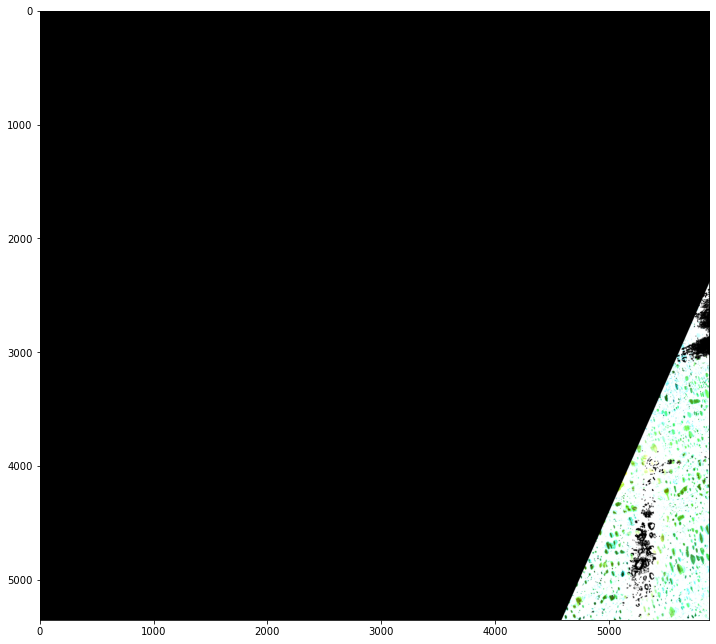

In [20]:
rgb = np.dstack((band_r, band_g, band_b))
plt.figure(figsize=(12, 12))
plt.imshow(rgb)

In [21]:
src.bounds

BoundingBox(left=340610.828997643, bottom=7755078.36051094, right=517091.688000249, top=7915630.04458002)

In [24]:
band1 = src.read(1)
band1[5000:, 5000:]

array([[487, 452, 443, ..., 372, 379, 383],
       [408, 429, 446, ..., 388, 407, 420],
       [428, 460, 418, ..., 411, 396, 435],
       ...,
       [336, 329, 333, ..., 414, 343, 193],
       [336, 337, 338, ..., 379, 240, 149],
       [330, 335, 344, ..., 308, 193, 169]], dtype=int16)

In [22]:
x, y = (src.bounds.left + 1500, src.bounds.top - 2000)
row, col = src.index(x, y)

In [23]:
row, col

(66, 49)

In [24]:
band_g[row, col]

184

In [25]:
band_b[row, col]

49

In [26]:
band_r[row, col]

231

In [27]:
src.xy(src.height // 2, src.width // 2)

(428851.25849894603, 7835354.20254548)